In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gastos_publicos = pd.read_excel('imf_government_expenditure.xls')

In [3]:
gastos_publicos = gastos_publicos.sort_values(by='Country', ascending=True).reset_index(drop=True)

In [4]:
tic_gov = pd.read_excel('ict_in_government.xlsx')

In [5]:
tic_gov = tic_gov.sort_values(by='Country', ascending=True).reset_index(drop=True)

In [6]:
tic_gov = tic_gov[tic_gov['Year'] == 2024]

In [7]:
tic_gov['Soma das Respotas Positivas'] = tic_gov['Indicator_1'] + tic_gov['Indicator_2'] + tic_gov['Indicator_3']

In [8]:
tic_gov = tic_gov.iloc[:, [0, 5]]

In [9]:
gastos_publicos['Country'] = gastos_publicos['Country'].replace({
    "China, People's Republic of": 'China',
    'Iran': 'Iran (Islamic Republic of)',
    'Korea, Republic of': 'Republic of Korea',
    'Micronesia, Fed. States of': 'Micronesia (Federated States of)',
    'Republic of Congo': 'Congo',
    'Tanzania': 'United Republic of Tanzania',
    'Slovak Republic': 'Slovakia',
    'Türkiye, Republic of': 'Turkey',
    'Moldova': 'Republic of Moldova',
    'Vietnam': 'Viet Nam',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'United States': 'United States of America',
    'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland'
})

In [10]:
paises = gastos_publicos['Country'].unique().tolist()

In [11]:
tic_gov = tic_gov[tic_gov['Country'].isin(paises)].reset_index(drop=True)

In [12]:
df = pd.DataFrame()

In [13]:
df['Soma das Respotas Positivas'] = tic_gov['Soma das Respotas Positivas']

In [14]:
df['Gastos públicos (% do PIB)'] = gastos_publicos['Percentage']

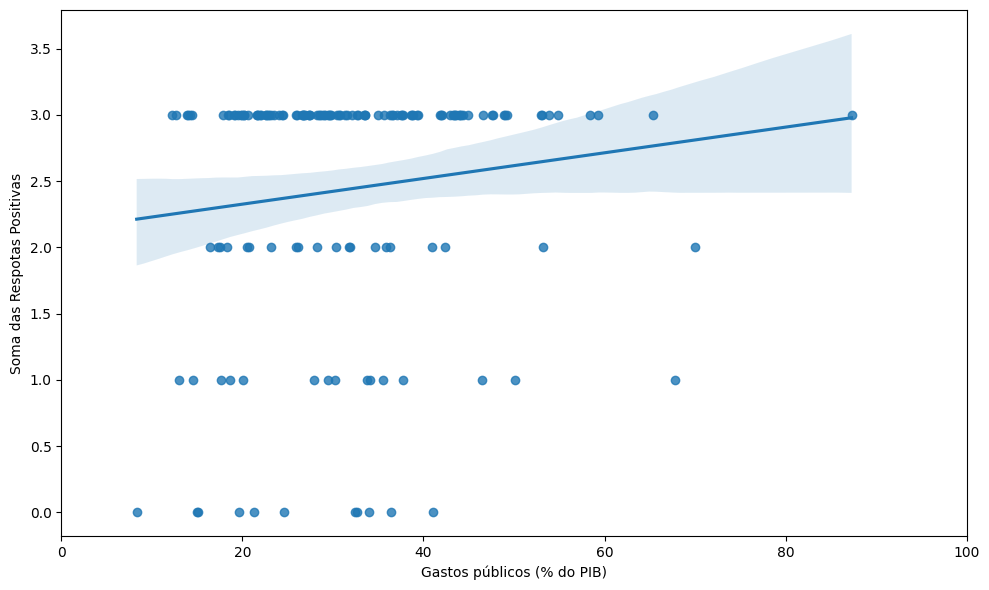

In [15]:
plt.figure(figsize=(10, 6))

sns.regplot(df, x='Gastos públicos (% do PIB)', y='Soma das Respotas Positivas')

plt.xlim(0, 100)
plt.tight_layout()
plt.savefig('C:/Users/lazar/Master-Dissertation/figuras/ict_in_government/dispersao_ticegov_govexpenditure.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
df.corr(method='spearman')

,Soma das Respotas Positivas,Gastos públicos (% do PIB)
Soma das Respotas Positivas,1.000000,0.130445
Gastos públicos (% do PIB),0.130445,1.000000
